In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Exact Solution
$$ u(t, x) = cos(\pi(x-t))$$ 
for $\|x-t\| \leq \frac{1}{2} $ otherwise 0

In [4]:
def exact_sol(t, x):
    sol = np.cos(np.pi*(x-t)) ** 2
    sol[np.abs(x-t) > 1/2] = 0
    return sol

In [5]:
def initial_cond(x):
    y = np.cos(np.pi*x) ** 2
    y[np.abs(x)> (1/2)] = 0
    return y

In [48]:
def mesh(h, lamb):
    k = lamb * h

    M = int(round(6/h + 1))
    N = int(round(2/k))
    x = np.linspace(-3, 3, M)
    
    inititial = np.cos(np.pi * x) ** 2
    inititial[np.abs(x)>1/2] = 0
    inititial.reshape(M, 1)
        
    y = np.zeros((M, N))
    grid = np.vstack((inititial, y))
    return grid

M, N = mesh(1/10, 0.8)
M, N

In [49]:
y = mesh(1/10, 0.8)
y.shape

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 61 and the array at index 1 has size 25

# Define the FDM Scheme

## Forwad-time backward-space

$$ \frac{v_{m}^{n+1} - v_{m}^{n}}{k} + a\frac{v_{m}^{n} - v_{m-1}^{n}}{h} = 0$$
&harr; $v_{m}^{n+1} = (1 - \lambda)v_{m}^{n} + \lambda v_{m-1}^{n} $

In [38]:
def FTBS(h, lamb):
    mesh_t, x = mesh(h, lamb)
    y = initial_cond(x)
    plt.plot(x, y, label="initial")
    for n in range(len(mesh_t)):
        for m in range(1, len(x)):
            y[m] = (1-lamb)*y[m] + lamb*y[m-1]
        # plt.plot(x, y)           
    return x, y
    


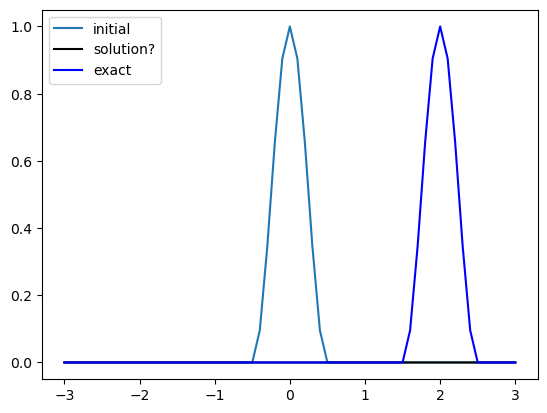

In [39]:
x, sol = FTBS(1/10, 0.8)
plt.plot(x, sol, c='k', label="solution?")
plt.plot(x, exact_sol(2, x), c='b', label='exact')
plt.legend()
plt.show()

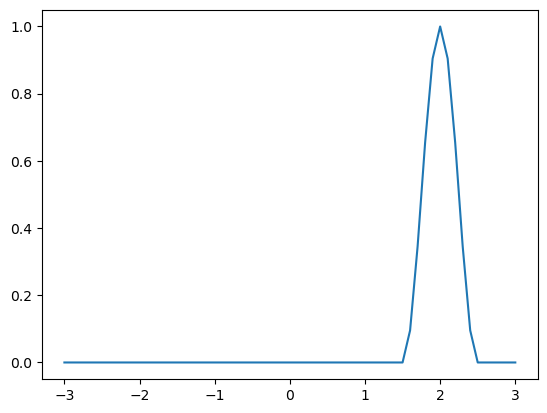

In [40]:
plt.plot(x, exact_sol(2, x)-sol);

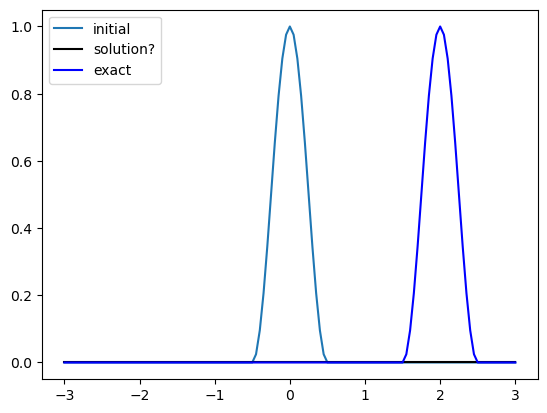

In [41]:
x, sol = FTBS(1/20, 0.8)
plt.plot(x, sol, c='k', label="solution?")
plt.plot(x, exact_sol(2, x), c='b', label='exact')
plt.legend()
plt.show()

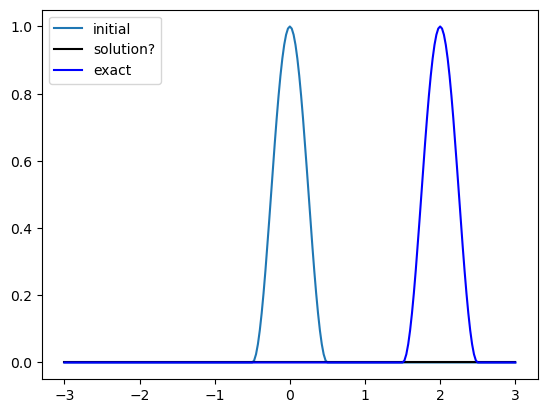

In [42]:
x, sol = FTBS(1/40, 0.8)
plt.plot(x, sol, c='k', label="solution?")
plt.plot(x, exact_sol(2, x), c='b', label='exact')
plt.legend()
plt.show()

## Forwad-time Central-space

$$ \frac{v_{m}^{n+1} - v_{m}^{n}}{k} + a\frac{v_{m+1}^{n} - v_{m-1}^{n}}{2h} $$
$$v_{m}^{n+1} = v_{m}^{n} + \frac{\lambda}{2}(v_{m-1}^{n} - v_{m+1}^{n})$$

In [43]:
def FTCS(h, lamb):
    mesh_t, x = mesh(h, lamb)
    y = initial_cond(x)
    plt.plot(x, y, label="initial")
    for n in range(len(mesh_t)):
        for m in range(1, len(x)-1):
            y[m] = y[m] + (lamb/2)*(y[m-1] - y[m+1])
        # plt.plot(x, y)           
    return x, y
      
      
      
      
      

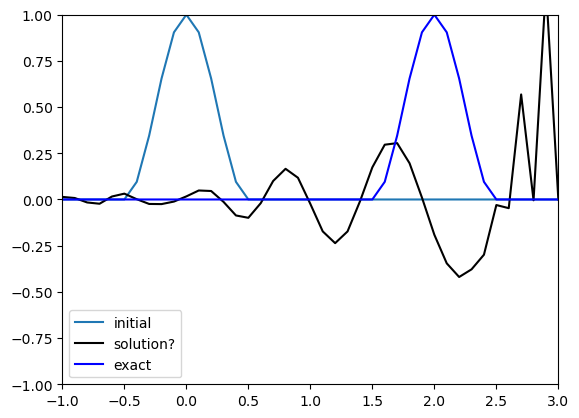

In [44]:
x, sol = FTCS(1/10, 0.8)
plt.plot(x, sol, c='k', label="solution?")
plt.plot(x, exact_sol(2, x), c='b', label='exact')
plt.legend()
plt.xlim(-1, 3); plt.ylim(-1, 1)
plt.show()

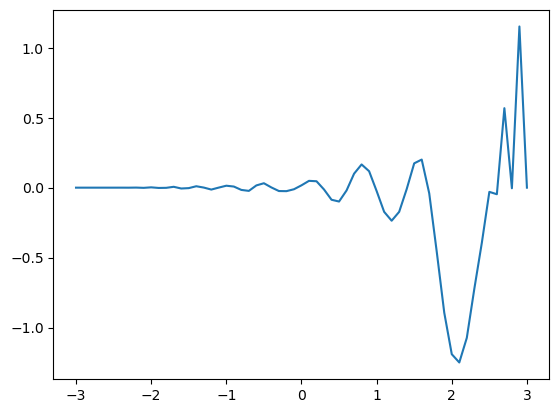

In [45]:
plt.plot(x, sol - exact_sol(2, x));

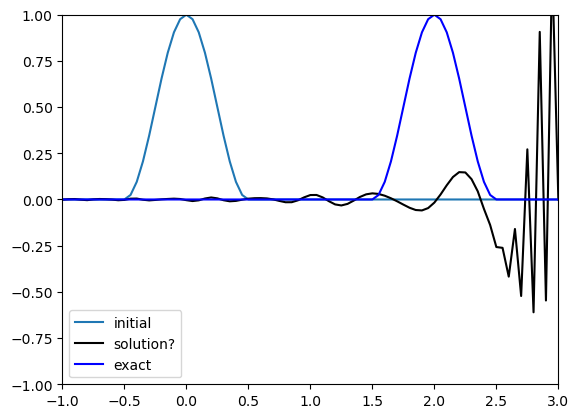

In [46]:
x, sol = FTCS(1/20, 0.8)
plt.plot(x, sol, c='k', label="solution?")
plt.plot(x, exact_sol(2, x), c='b', label='exact')
plt.xlim(-1, 3); plt.ylim(-1, 1)
plt.legend()
plt.show()

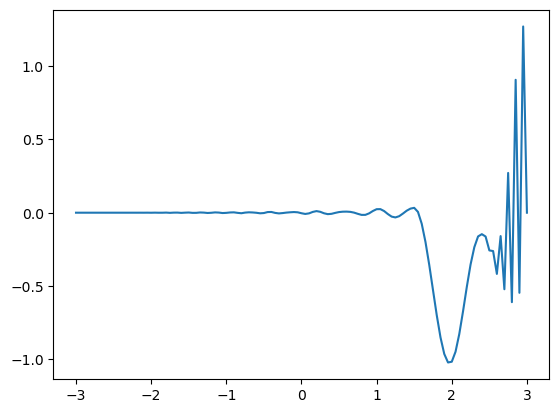

In [47]:
plt.plot(x, sol - exact_sol(2, x));

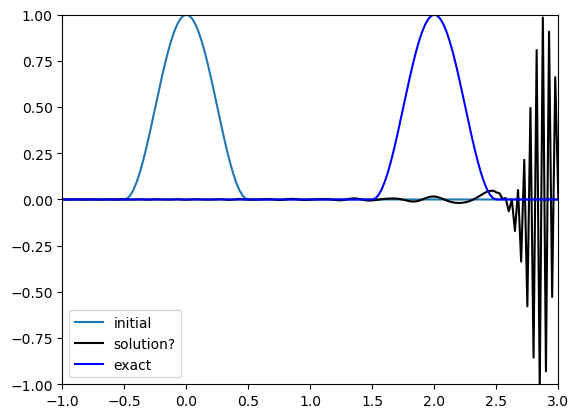

In [48]:
x, sol = FTCS(1/40, 0.8)
plt.plot(x, sol, c='k', label="solution?")
plt.plot(x, exact_sol(2, x), c='b', label='exact')
plt.legend()
plt.xlim(-1, 3) ; plt.ylim(-1, 1)
plt.show()

## Lax-Friedrichs

$$ \frac{v_{m}^{n+1} - \frac{1}{2}\left(v_{m+1}^{n}+v_{m-1}^{n}\right)}{k} + a\frac{v_{m+1}^{n} - v_{m-1}^{n}}{2h} $$
$$ v_{m}^{n+1} = \frac{1}{2}(1-\lambda)v_{m+1}^{n} + \frac{1}{2}(1+\lambda)v_{m-1}^{n}$$

In [49]:
def Lax_Fried(h, lamb):
    mesh_t, x = mesh(h, lamb)
    y = initial_cond(x)
    plt.plot(x, y, label="initial")
    for n in range(len(mesh_t)):
        for m in range(1, len(x)-1):
            y[m] =(1/2) * (1 - lamb)* y[m+1] + (1/2)*(1+ lamb)*y[m-1]
        # plt.plot(x, y)           
    return x, y
    

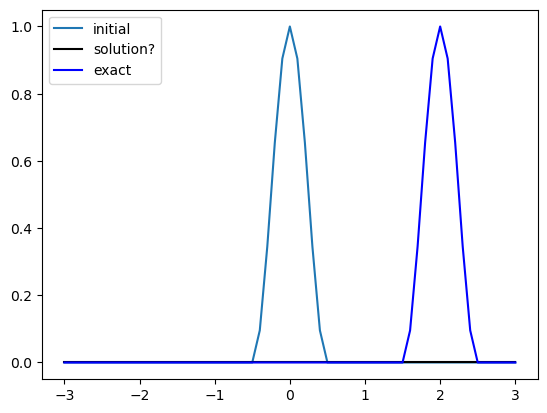

In [50]:
x, sol = Lax_Fried(1/10, 0.8)
plt.plot(x, sol, c='k', label="solution?")
plt.plot(x, exact_sol(2, x), c='b', label='exact')
plt.legend()
plt.show()

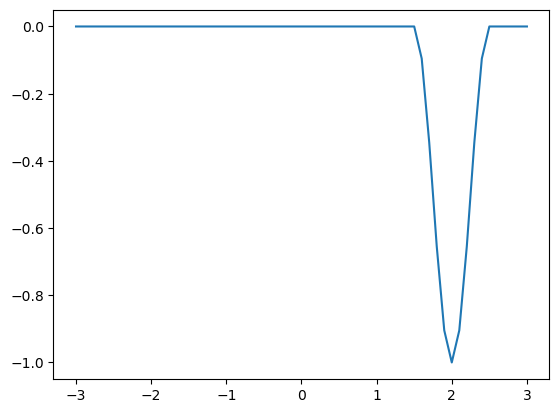

In [51]:
plt.plot(x, sol - exact_sol(2, x));

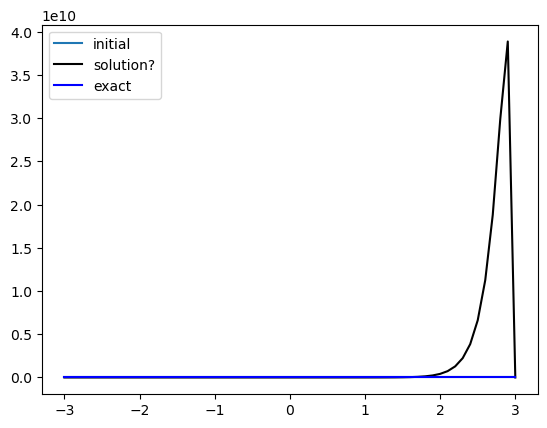

In [52]:
x, sol = Lax_Fried(1/10, 1.6)
plt.plot(x, sol, c='k', label="solution?")
plt.plot(x, exact_sol(2, x), c='b', label='exact')
plt.legend()
# plt.xlim(-1, 3); plt.ylim(-1, 1)
plt.show()

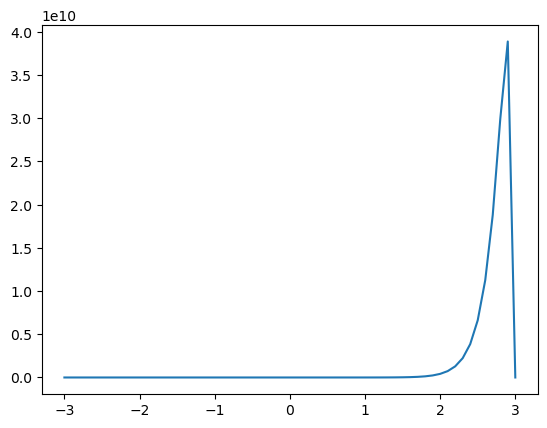

In [53]:
plt.plot(x, sol - exact_sol(2, x));

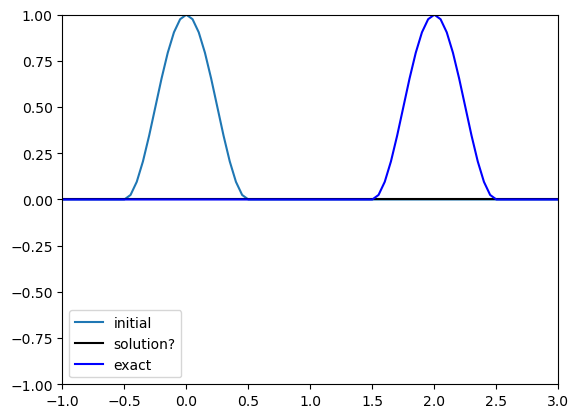

In [54]:
x, sol = Lax_Fried(1/20, 0.8)
plt.plot(x, sol, c='k', label="solution?")
plt.plot(x, exact_sol(2, x), c='b', label='exact')
plt.xlim(-1, 3); plt.ylim(-1, 1)
plt.legend()
plt.show()

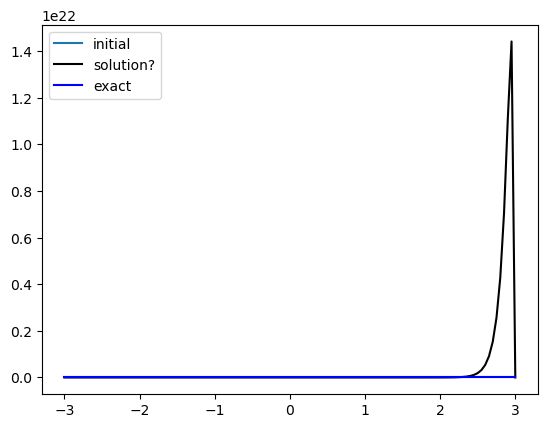

In [55]:
x, sol = Lax_Fried(1/20, 1.6)
plt.plot(x, sol, c='k', label="solution?")
plt.plot(x, exact_sol(2, x), c='b', label='exact')
plt.legend()
plt.show()

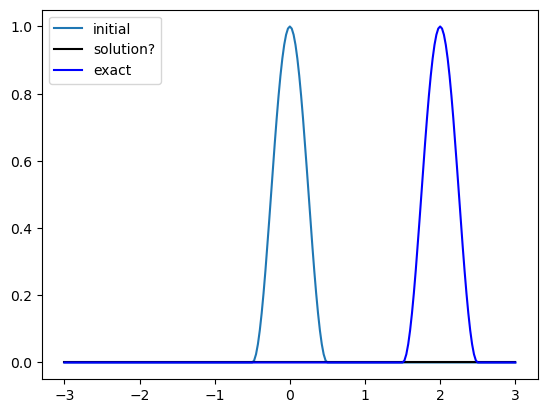

In [56]:
x, sol = Lax_Fried(1/40, 0.8)
plt.plot(x, sol, c='k', label="solution?")
plt.plot(x, exact_sol(2, x), c='b', label='exact')
plt.legend()
plt.show()

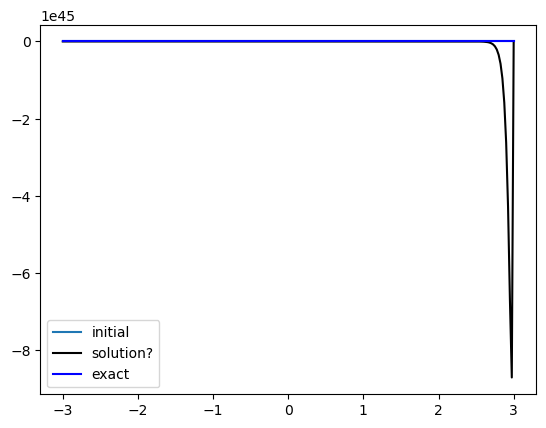

In [57]:
x, sol = Lax_Fried(1/40, 1.6)
plt.plot(x, sol, c='k', label="solution?")
plt.plot(x, exact_sol(2, x), c='b', label='exact')
plt.legend()
plt.show()

## Leapfrog
$$ \frac{v_{m}^{n+1} - v_{m}^{n-1}}{2k} + a\frac{v_{m+1}^{n} - v_{m-1}^{n}}{2h} $$
$$ v_{m}^{n+1} = v_{m}^{n-1} -\lambda( v_{m+1}^{n} - v_{m-1}^{n})$$
Only `2-step` in this problem set

In [58]:
def Leapfrog(h, lamb):
    mesh_t, x = mesh(h, lamb)
    y = initial_cond(x)
    plt.plot(x, y, label="initial")
    y_copy = np.copy(y)
    for m in range(1, len(x)-1):
        y_copy[m] =(1/2) * (1 - lamb)* y[m+1] + (1/2)*(1+ lamb)*y[m-1]
    for n in range(2, len(mesh_t)):       
        for m in range(1, len(x)-1):
            y[m] = y_copy[m] - lamb*(y[m+1] - y[m-1])
        y_copy = np.copy(y)   
        # plt.plot(x, y)           
    return x, y

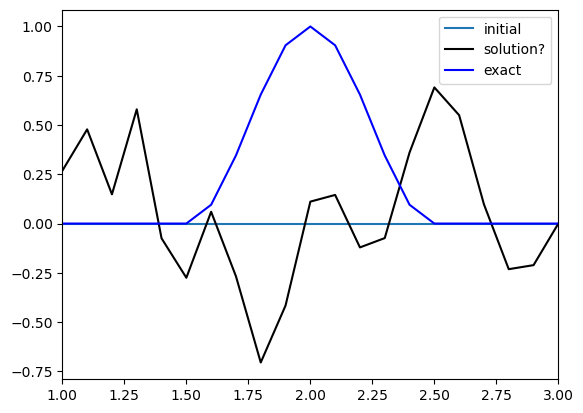

In [59]:
x, sol = Leapfrog(1/10, 0.8)
plt.plot(x, sol, c='k', label="solution?")
plt.plot(x, exact_sol(2, x), c='b', label='exact')
plt.xlim(1, 3)
plt.legend()
plt.show()

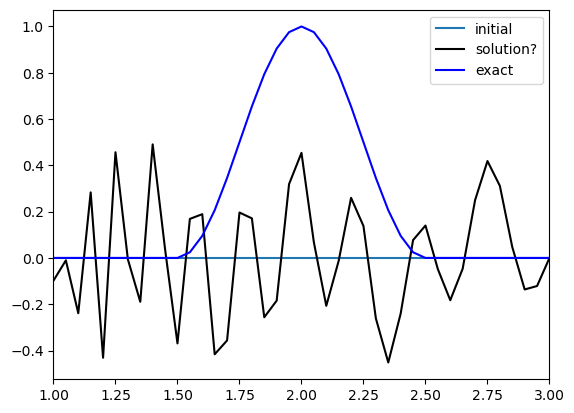

In [60]:
x, sol = Leapfrog(1/20, 0.8)
plt.plot(x, sol, c='k', label="solution?")
plt.plot(x, exact_sol(2, x), c='b', label='exact')
plt.xlim(1, 3)
plt.legend()
plt.show()

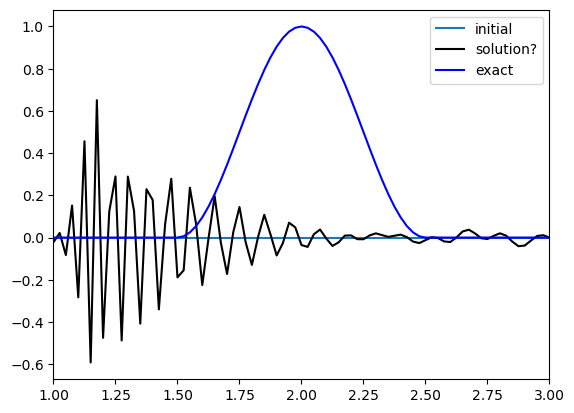

In [61]:
x, sol = Leapfrog(1/40, 0.8)
plt.plot(x, sol, c='k', label="solution?")
plt.plot(x, exact_sol(2, x), c='b', label='exact')
plt.xlim(1, 3)
plt.legend()
plt.show()

## Forward-time Forward-space
$$ \frac{v_{m}^{n+1} - v_{m}^{n}}{k} + a \frac{v_{m+1}^{n} - v_{m}^{n}}{h} = 0$$
$$v_{m}^{n+1} =  - \lambda v_{m+1}^{n} + (1+\lambda)v_{m}^{n}$$

In [62]:
def FTFS(h, lamb):
    mesh_t, x = mesh(h, lamb)
    y = initial_cond(x)
    plt.plot(x, y, label="initial")
    for n in range(len(mesh_t)):
        for m in range(0, len(x)-1):
            y[m] = (1+lamb)*y[m] - lamb*y[m+1]
        # plt.plot(x, y)           
    return x, y
    


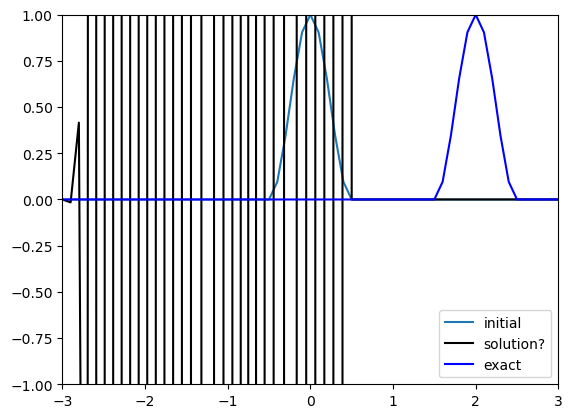

In [63]:
x, sol = FTFS(1/10, 0.8)
plt.plot(x, sol, c='k', label="solution?")
plt.plot(x, exact_sol(2, x), c='b', label='exact')
plt.xlim(-3, 3); plt.ylim (-1, 1)
plt.legend()
plt.show()

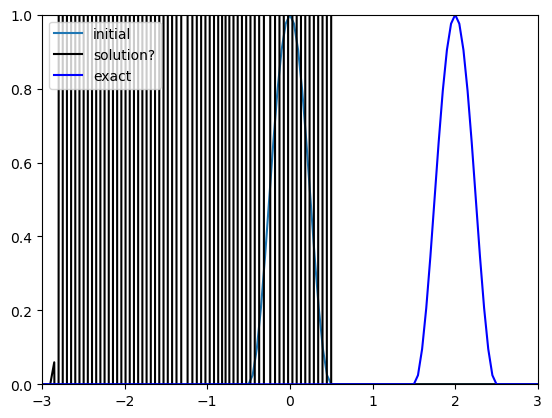

In [64]:
x, sol = FTFS(1/20, 0.8)
plt.plot(x, sol, c='k', label="solution?")
plt.plot(x, exact_sol(2, x), c='b', label='exact')
plt.xlim(-3, 3); plt.ylim(0, 1)
plt.legend()
plt.show()

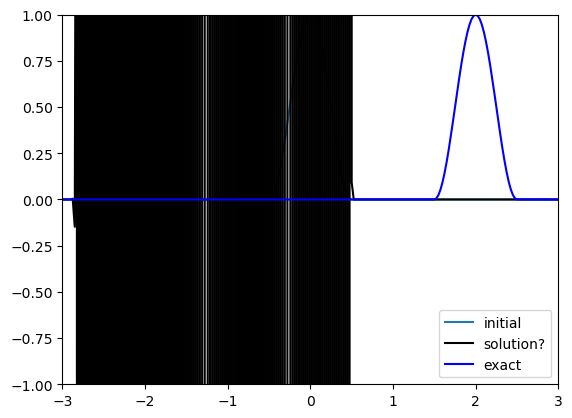

In [65]:
x, sol = FTFS(1/40, 0.8)
plt.plot(x, sol, c='k', label="solution?")
plt.plot(x, exact_sol(2, x), c='b', label='exact')
plt.xlim(-3, 3); plt.ylim(-1, 1)
plt.legend()
plt.show()